# DataFrame内を行方向、列方向に処理して統計量を計算し、散布図を作成する。

1. CSV読み込み。`.read_csv`
1. DataFrameの行ごとにデータ処理。
    - 1行ずつ評価し、データ抽出。`for idx, df_select in df_original():`
    - 一括で評価し、indexと列名を頼りに、元のデータで上書きする。`df_new = df_new.update(df_original)`
1. DataFrameの列ごとにデータ処理。` df.sum(axis=1)`
1. 列ごとに統計量計算。
1. 平均と分散を使って散布図作成。

---
## 1. CSVファイル読み込み DataFrameに保存

In [15]:
import pandas as pd

csv_encoding = 'Shift_JISx0213'
#inputFile = ".\\Data\\02_ClassfiedList_raw.csv"
inputFile = ".\\Data\\1.csv"

df = pd.read_csv(inputFile,index_col=False, encoding=csv_encoding)
display(df.head(5))
display(df.dtypes)
display(df.shape)

,SCC,K,S,E
0,55020091,1,1,1
1,55020091,1,1,1
2,55020091,1,1,1
3,55020091,1,1,1
4,55020091,1,1,1


SCC    int64
K      int64
S      int64
E      int64
dtype: object

(63407, 4)

---
## 2. DataFrameの値を調整
SC列を削除し、NaNを0に置き換える。SCC列をindexに変換。

In [2]:
#df = df[['SCC','Total', 'Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']].fillna(0)
#所在地都道府県コード,都道府県名,学校コード,学校名,設置者コード,設置者名,学年,答案番号,出席番号_1国,出席番号_1数,出席番号_1英,出席番号_2国,出席番号_2社A,出席番号_2社B,出席番号_2数,出席番号_2理A,出席番号_2理B,出席番号_2英,教室番号_1国,教室番号_1数,教室番号_1英,教室番号_2国,教室番号_2社A,教室番号_2社B,教室番号_2数,教室番号_2理A,教室番号_2理B,教室番号_2英,集計対象_1国,集計対象_1数,集計対象_1英,集計対象_2国,集計対象_2社A,集計対象_2社B,集計対象_2数,集計対象_2理A,集計対象_2理B,集計対象_2英,正答数_1国,正答数_1数,正答数_1英,正答数_2国,正答数_2社A,正答数_2社B,正答数_2数,正答数_2理A,正答数_2理B,正答数_2英,類型_1国_01,類型_1国_02,類型_1国_03,類型_1国_04,類型_1国_05,類型_1国_06,類型_1国_07,類型_1国_08,類型_1国_09,類型_1国_10,類型_1国_11,類型_1国_12,類型_1国_13,類型_1国_14,類型_1国_15,類型_1国_16,類型_1国_17,類型_1国_18,類型_1国_19,類型_1国_20,類型_1国_21,類型_1国_22,類型_1国_23,類型_1国_24,類型_1国_25,類型_1国_26,類型_1国_27,類型_1国_28,類型_1国_29,類型_1国_30,類型_1国_31,類型_1国_32,類型_1国_33,類型_1国_34,類型_1国_35,類型_1国_36,類型_1国_37,類型_1国_38,類型_1国_39,類型_1国_40,類型_1数_01,類型_1数_02,類型_1数_03,類型_1数_04,類型_1数_05,類型_1数_06,類型_1数_07,類型_1数_08,類型_1数_09,類型_1数_10,類型_1数_11,類型_1数_12,類型_1数_13,類型_1数_14,類型_1数_15,類型_1数_16,類型_1数_17,類型_1数_18,類型_1数_19,類型_1数_20,類型_1数_21,類型_1数_22,類型_1数_23,類型_1数_24,類型_1数_25,類型_1数_26,類型_1数_27,類型_1数_28,類型_1数_29,類型_1数_30,類型_1数_31,類型_1英_01,類型_1英_02,類型_1英_03,類型_1英_04,類型_1英_05,類型_1英_06,類型_1英_07,類型_1英_08,類型_1英_09,類型_1英_10,類型_1英_11,類型_1英_12,類型_1英_13,類型_1英_14,類型_1英_15,類型_1英_16,類型_1英_17,類型_1英_18,類型_1英_19,類型_1英_20,類型_1英_21,類型_1英_22,類型_1英_23,類型_1英_24,類型_1英_25,類型_1英_26,類型_1英_27,類型_1英_28,類型_1英_29,類型_1英_30,類型_1英_31,類型_1英_32,類型_1英_33,類型_1英_34,類型_1英_35,類型_1英_36,類型_1英_37,類型_2国_01,類型_2国_02,類型_2国_03,類型_2国_04,類型_2国_05,類型_2国_06,類型_2国_07,類型_2国_08,類型_2国_09,類型_2国_10,類型_2国_11,類型_2国_12,類型_2国_13,類型_2国_14,類型_2国_15,類型_2国_16,類型_2国_17,類型_2国_18,類型_2国_19,類型_2国_20,類型_2国_21,類型_2国_22,類型_2国_23,類型_2国_24,類型_2国_25,類型_2国_26,類型_2国_27,類型_2国_28,類型_2国_29,類型_2国_30,類型_2国_31,類型_2国_32,類型_2国_33,類型_2国_34,類型_2国_35,類型_2国_36,類型_2国_37,類型_2国_38,類型_2社A_01,類型_2社A_02,類型_2社A_03,類型_2社A_04,類型_2社A_05,類型_2社A_06,類型_2社A_07,類型_2社A_08,類型_2社A_09,類型_2社A_10,類型_2社A_11,類型_2社A_12,類型_2社A_13,類型_2社A_14,類型_2社A_15,類型_2社A_16,類型_2社A_17,類型_2社A_18,類型_2社A_19,類型_2社A_20,類型_2社A_21,類型_2社A_22,類型_2社A_23,類型_2社A_24,類型_2社A_25,類型_2社A_26,類型_2社A_27,類型_2社A_28,類型_2社A_29,類型_2社A_30,類型_2社A_31,類型_2社A_32,類型_2社A_33,類型_2社A_34,類型_2社A_35,類型_2社B_01,類型_2社B_02,類型_2社B_03,類型_2社B_04,類型_2社B_05,類型_2社B_06,類型_2社B_07,類型_2社B_08,類型_2社B_09,類型_2社B_10,類型_2社B_11,類型_2社B_12,類型_2社B_13,類型_2社B_14,類型_2社B_15,類型_2社B_16,類型_2社B_17,類型_2社B_18,類型_2社B_19,類型_2社B_20,類型_2社B_21,類型_2社B_22,類型_2社B_23,類型_2社B_24,類型_2社B_25,類型_2社B_26,類型_2社B_27,類型_2社B_28,類型_2社B_29,類型_2社B_30,類型_2社B_31,類型_2社B_32,類型_2社B_33,類型_2社B_34,類型_2社B_35,類型_2数_01,類型_2数_02,類型_2数_03,類型_2数_04,類型_2数_05,類型_2数_06,類型_2数_07,類型_2数_08,類型_2数_09,類型_2数_10,類型_2数_11,類型_2数_12,類型_2数_13,類型_2数_14,類型_2数_15,類型_2数_16,類型_2数_17,類型_2数_18,類型_2数_19,類型_2数_20,類型_2数_21,類型_2数_22,類型_2数_23,類型_2数_24,類型_2数_25,類型_2数_26,類型_2数_27,類型_2数_28,類型_2数_29,類型_2数_30,類型_2数_31,類型_2数_32,類型_2数_33,類型_2理A_01,類型_2理A_02,類型_2理A_03,類型_2理A_04,類型_2理A_05,類型_2理A_06,類型_2理A_07,類型_2理A_08,類型_2理A_09,類型_2理A_10,類型_2理A_11,類型_2理A_12,類型_2理A_13,類型_2理A_14,類型_2理A_15,類型_2理A_16,類型_2理A_17,類型_2理A_18,類型_2理A_19,類型_2理A_20,類型_2理A_21,類型_2理A_22,類型_2理A_23,類型_2理A_24,類型_2理A_25,類型_2理A_26,類型_2理A_27,類型_2理A_28,類型_2理A_29,類型_2理A_30,類型_2理A_31,類型_2理A_32,類型_2理B_01,類型_2理B_02,類型_2理B_03,類型_2理B_04,類型_2理B_05,類型_2理B_06,類型_2理B_07,類型_2理B_08,類型_2理B_09,類型_2理B_10,類型_2理B_11,類型_2理B_12,類型_2理B_13,類型_2理B_14,類型_2理B_15,類型_2理B_16,類型_2理B_17,類型_2理B_18,類型_2理B_19,類型_2理B_20,類型_2理B_21,類型_2理B_22,類型_2理B_23,類型_2理B_24,類型_2理B_25,類型_2理B_26,類型_2理B_27,類型_2理B_28,類型_2理B_29,類型_2理B_30,類型_2理B_31,類型_2理B_32,類型_2英_01,類型_2英_02,類型_2英_03,類型_2英_04,類型_2英_05,類型_2英_06,類型_2英_07,類型_2英_08,類型_2英_09,類型_2英_10,類型_2英_11,類型_2英_12,類型_2英_13,類型_2英_14,類型_2英_15,類型_2英_16,類型_2英_17,類型_2英_18,類型_2英_19,類型_2英_20,類型_2英_21,類型_2英_22,類型_2英_23,類型_2英_24,類型_2英_25,類型_2英_26,類型_2英_27,類型_2英_28,類型_2英_29,類型_2英_30,類型_2英_31,類型_2英_32,類型_2英_33,類型_2英_34,類型_2英_35,類型_2英_36,類型_2英_37,正誤_1国_01,正誤_1国_02,正誤_1国_03,正誤_1国_04,正誤_1国_05,正誤_1国_06,正誤_1国_07,正誤_1国_08,正誤_1国_09,正誤_1国_10,正誤_1国_11,正誤_1国_12,正誤_1国_13,正誤_1国_14,正誤_1国_15,正誤_1国_16,正誤_1国_17,正誤_1国_18,正誤_1国_19,正誤_1国_20,正誤_1国_21,正誤_1国_22,正誤_1国_23,正誤_1国_24,正誤_1国_25,正誤_1国_26,正誤_1国_27,正誤_1国_28,正誤_1国_29,正誤_1国_30,正誤_1国_31,正誤_1国_32,正誤_1国_33,正誤_1国_34,正誤_1国_35,正誤_1国_36,正誤_1国_37,正誤_1国_38,正誤_1国_39,正誤_1国_40,正誤_1数_01,正誤_1数_02,正誤_1数_03,正誤_1数_04,正誤_1数_05,正誤_1数_06,正誤_1数_07,正誤_1数_08,正誤_1数_09,正誤_1数_10,正誤_1数_11,正誤_1数_12,正誤_1数_13,正誤_1数_14,正誤_1数_15,正誤_1数_16,正誤_1数_17,正誤_1数_18,正誤_1数_19,正誤_1数_20,正誤_1数_21,正誤_1数_22,正誤_1数_23,正誤_1数_24,正誤_1数_25,正誤_1数_26,正誤_1数_27,正誤_1数_28,正誤_1数_29,正誤_1数_30,正誤_1数_31,正誤_1英_01,正誤_1英_02,正誤_1英_03,正誤_1英_04,正誤_1英_05,正誤_1英_06,正誤_1英_07,正誤_1英_08,正誤_1英_09,正誤_1英_10,正誤_1英_11,正誤_1英_12,正誤_1英_13,正誤_1英_14,正誤_1英_15,正誤_1英_16,正誤_1英_17,正誤_1英_18,正誤_1英_19,正誤_1英_20,正誤_1英_21,正誤_1英_22,正誤_1英_23,正誤_1英_24,正誤_1英_25,正誤_1英_26,正誤_1英_27,正誤_1英_28,正誤_1英_29,正誤_1英_30,正誤_1英_31,正誤_1英_32,正誤_1英_33,正誤_1英_34,正誤_1英_35,正誤_1英_36,正誤_1英_37,正誤_2国_01,正誤_2国_02,正誤_2国_03,正誤_2国_04,正誤_2国_05,正誤_2国_06,正誤_2国_07,正誤_2国_08,正誤_2国_09,正誤_2国_10,正誤_2国_11,正誤_2国_12,正誤_2国_13,正誤_2国_14,正誤_2国_15,正誤_2国_16,正誤_2国_17,正誤_2国_18,正誤_2国_19,正誤_2国_20,正誤_2国_21,正誤_2国_22,正誤_2国_23,正誤_2国_24,正誤_2国_25,正誤_2国_26,正誤_2国_27,正誤_2国_28,正誤_2国_29,正誤_2国_30,正誤_2国_31,正誤_2国_32,正誤_2国_33,正誤_2国_34,正誤_2国_35,正誤_2国_36,正誤_2国_37,正誤_2国_38,正誤_2社A_01,正誤_2社A_02,正誤_2社A_03,正誤_2社A_04,正誤_2社A_05,正誤_2社A_06,正誤_2社A_07,正誤_2社A_08,正誤_2社A_09,正誤_2社A_10,正誤_2社A_11,正誤_2社A_12,正誤_2社A_13,正誤_2社A_14,正誤_2社A_15,正誤_2社A_16,正誤_2社A_17,正誤_2社A_18,正誤_2社A_19,正誤_2社A_20,正誤_2社A_21,正誤_2社A_22,正誤_2社A_23,正誤_2社A_24,正誤_2社A_25,正誤_2社A_26,正誤_2社A_27,正誤_2社A_28,正誤_2社A_29,正誤_2社A_30,正誤_2社A_31,正誤_2社A_32,正誤_2社A_33,正誤_2社A_34,正誤_2社A_35,正誤_2社B_01,正誤_2社B_02,正誤_2社B_03,正誤_2社B_04,正誤_2社B_05,正誤_2社B_06,正誤_2社B_07,正誤_2社B_08,正誤_2社B_09,正誤_2社B_10,正誤_2社B_11,正誤_2社B_12,正誤_2社B_13,正誤_2社B_14,正誤_2社B_15,正誤_2社B_16,正誤_2社B_17,正誤_2社B_18,正誤_2社B_19,正誤_2社B_20,正誤_2社B_21,正誤_2社B_22,正誤_2社B_23,正誤_2社B_24,正誤_2社B_25,正誤_2社B_26,正誤_2社B_27,正誤_2社B_28,正誤_2社B_29,正誤_2社B_30,正誤_2社B_31,正誤_2社B_32,正誤_2社B_33,正誤_2社B_34,正誤_2社B_35,正誤_2数_01,正誤_2数_02,正誤_2数_03,正誤_2数_04,正誤_2数_05,正誤_2数_06,正誤_2数_07,正誤_2数_08,正誤_2数_09,正誤_2数_10,正誤_2数_11,正誤_2数_12,正誤_2数_13,正誤_2数_14,正誤_2数_15,正誤_2数_16,正誤_2数_17,正誤_2数_18,正誤_2数_19,正誤_2数_20,正誤_2数_21,正誤_2数_22,正誤_2数_23,正誤_2数_24,正誤_2数_25,正誤_2数_26,正誤_2数_27,正誤_2数_28,正誤_2数_29,正誤_2数_30,正誤_2数_31,正誤_2数_32,正誤_2数_33,正誤_2理A_01,正誤_2理A_02,正誤_2理A_03,正誤_2理A_04,正誤_2理A_05,正誤_2理A_06,正誤_2理A_07,正誤_2理A_08,正誤_2理A_09,正誤_2理A_10,正誤_2理A_11,正誤_2理A_12,正誤_2理A_13,正誤_2理A_14,正誤_2理A_15,正誤_2理A_16,正誤_2理A_17,正誤_2理A_18,正誤_2理A_19,正誤_2理A_20,正誤_2理A_21,正誤_2理A_22,正誤_2理A_23,正誤_2理A_24,正誤_2理A_25,正誤_2理A_26,正誤_2理A_27,正誤_2理A_28,正誤_2理A_29,正誤_2理A_30,正誤_2理A_31,正誤_2理A_32,正誤_2理B_01,正誤_2理B_02,正誤_2理B_03,正誤_2理B_04,正誤_2理B_05,正誤_2理B_06,正誤_2理B_07,正誤_2理B_08,正誤_2理B_09,正誤_2理B_10,正誤_2理B_11,正誤_2理B_12,正誤_2理B_13,正誤_2理B_14,正誤_2理B_15,正誤_2理B_16,正誤_2理B_17,正誤_2理B_18,正誤_2理B_19,正誤_2理B_20,正誤_2理B_21,正誤_2理B_22,正誤_2理B_23,正誤_2理B_24,正誤_2理B_25,正誤_2理B_26,正誤_2理B_27,正誤_2理B_28,正誤_2理B_29,正誤_2理B_30,正誤_2理B_31,正誤_2理B_32,正誤_2英_01,正誤_2英_02,正誤_2英_03,正誤_2英_04,正誤_2英_05,正誤_2英_06,正誤_2英_07,正誤_2英_08,正誤_2英_09,正誤_2英_10,正誤_2英_11,正誤_2英_12,正誤_2英_13,正誤_2英_14,正誤_2英_15,正誤_2英_16,正誤_2英_17,正誤_2英_18,正誤_2英_19,正誤_2英_20,正誤_2英_21,正誤_2英_22,正誤_2英_23,正誤_2英_24,正誤_2英_25,正誤_2英_26,正誤_2英_27,正誤_2英_28,正誤_2英_29,正誤_2英_30,正誤_2英_31,正誤_2英_32,正誤_2英_33,正誤_2英_34,正誤_2英_35,正誤_2英_36,正誤_2英_37

#display(df.head(5))

,SCC,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
0,110001,104,1.0,1.0,0.0,1.0,0.0
1,110002,95,2.0,2.0,0.0,0.0,0.0
2,110003,103,8.0,5.0,4.0,15.0,1.0
3,110004,104,13.0,2.0,4.0,13.0,0.0
4,120001,40,7.0,4.0,0.0,26.0,1.0


In [9]:
df = df.set_index('SCC')
display(df.head(5))
display(df.shape)

,K,S,E
SCC,,,
55020091,1,1,1
55020091,1,1,1
55020091,1,1,1
55020091,1,1,1
55020091,1,1,1


(63407, 3)

In [18]:
df1 = df.groupby(['SCC']).sum()
print(df1.head(5))

            K    S    E
SCC                    
50120001  190  190  190
50120002  170  170  170
50120003  295  295  295
50120004  178  177  178
50120005  113  114  114


---
## 3. Totalが10以上のレコードのうち、Pro1～Pro3のTotalに対する割合が大きい(30%以上)レコードを抽出する

### 3-1.Totalが10以上のレコードを残す。10未満を削除。  
レコード数が変わるので、deepcopyをして新しいDataFrameを生成しておく。

In [10]:
import copy
df_rate = pd.DataFrame()
df_rate = copy.deepcopy(df[df['Total'] >= 10])
display(df_rate.head(5))
display(df_rate.shape)

KeyError: 'Total'

### 3-2. Pro1～Pro3の値をTotalで割り、割合をパーセントで求める

In [5]:
for idx, df_select in df_rate.iterrows():
    # 1行ずつ取り出し、各列をTotalで割って100掛ける
    df_select = df_select / df_select['Total'] * 100
    # 元のDataFrameの値を更新
    df_rate.loc[idx] = df_select

display(df_rate.head(5))

,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
SCC,,,,,,
110001,100.0,0.961538,0.961538,0.000000,0.961538,0.000000
110002,100.0,2.105263,2.105263,0.000000,0.000000,0.000000
110003,100.0,7.766990,4.854369,3.883495,14.563107,0.970874
110004,100.0,12.500000,1.923077,3.846154,12.500000,0.000000
120001,100.0,17.500000,10.000000,0.000000,65.000000,2.500000


### 3-3. Pro1～Pro3の値に一つでも30以上があればその行を抽出する。 
#### 方法１：Pro1~Pro3の列に、一つでも30以上があれば抽出。
  - 抽出後は、整数に丸めておく。

In [6]:
df_rate_ext1 = df_rate[(df_rate['Pro1-1'] >= 30) | (df_rate['Pro1-2'] >= 30) | (df_rate['Pro1-3'] >= 30) | 
                       (df_rate['Pro2'] >= 30) | (df_rate['Pro3'] >= 30)]
display(df_rate_ext1.head(5))
display(df_rate_ext1.shape)

,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
SCC,,,,,,
120001,100.0,17.500000,10.000000,0.000000,65.000000,2.500000
120008,100.0,7.317073,2.439024,7.317073,31.707317,0.000000
120009,100.0,16.666667,0.000000,0.000000,33.333333,0.000000
120018,100.0,6.410256,7.692308,25.641026,50.000000,2.564103
120019,100.0,15.322581,12.903226,16.129032,41.935484,8.064516


(1598, 6)

#### 方法2 : Pro1～Pro3の全ての要素が30未満の行を削除。

In [7]:
df_rate_ext2 = df_rate[~(df_rate[['Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']] < 30)].dropna(how='all')
display(df_rate_ext2.head(5))
display(df_rate_ext2.shape)

,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
SCC,,,,,,
120001,NaN,NaN,NaN,NaN,65.000000,NaN
120008,NaN,NaN,NaN,NaN,31.707317,NaN
120009,NaN,NaN,NaN,NaN,33.333333,NaN
120018,NaN,NaN,NaN,NaN,50.000000,NaN
120019,NaN,NaN,NaN,NaN,41.935484,NaN


(1598, 6)

  - index、列名を頼りに、元のデータで上書きする。
  - floatをintに変換する。

In [8]:
df_rate_ext2.update(df_rate)
display(df_rate_ext2.head(5))
display(df_rate_ext2.shape)

,Total,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
SCC,,,,,,
120001,100.0,17.500000,10.000000,0.000000,65.000000,2.500000
120008,100.0,7.317073,2.439024,7.317073,31.707317,0.000000
120009,100.0,16.666667,0.000000,0.000000,33.333333,0.000000
120018,100.0,6.410256,7.692308,25.641026,50.000000,2.564103
120019,100.0,15.322581,12.903226,16.129032,41.935484,8.064516


(1598, 6)

---
## 4. レコードごとにPro1~Pro3の合計、平均、分散、標準偏差を求める。

統計量計算
  - 合計
  - 平均
  - 標準偏差
  - 分散

#### 方法1 : Pro1～Pro3の列を指定して、統計量を求める。

In [9]:
df_stat1 = pd.DataFrame()
df_stat1['Sum'] = df_rate_ext2[['Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']].sum(axis=1)
df_stat1['Mean'] = df_rate_ext2[['Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']].mean(axis=1)
df_stat1['Std'] = df_rate_ext2[['Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']].std(axis=1)
df_stat1['Var'] = df_rate_ext2[['Pro1-1', 'Pro1-2', 'Pro1-3', 'Pro2', 'Pro3']].var(axis=1)
display(df_stat1.head(5))
display(df_stat1.shape)

,Sum,Mean,Std,Var
SCC,,,,
120001,95.000000,19.000000,26.610618,708.125000
120008,48.780488,9.756098,12.673542,160.618679
120009,50.000000,10.000000,14.907120,222.222222
120018,92.307692,18.461538,19.749416,390.039448
120019,94.354839,18.870968,13.270969,176.118626


(1598, 4)

#### 方法2 : 不要な列'Total'を削除しておいて、全ての要素の統計量を求める。

In [10]:
df_stat2 = pd.DataFrame()
df_stat2['Sum'] = df_rate_ext2.drop(['Total'], axis=1).sum(axis=1)
df_stat2['Mean'] = df_rate_ext2.drop(['Total'], axis=1).mean(axis=1)
df_stat2['Std'] = df_rate_ext2.drop(['Total'], axis=1).std(axis=1)
df_stat2['Var'] = df_rate_ext2.drop(['Total'], axis=1).var(axis=1)
display(df_stat2.head(5))
display(df_stat2.shape)

,Sum,Mean,Std,Var
SCC,,,,
120001,95.000000,19.000000,26.610618,708.125000
120008,48.780488,9.756098,12.673542,160.618679
120009,50.000000,10.000000,14.907120,222.222222
120018,92.307692,18.461538,19.749416,390.039448
120019,94.354839,18.870968,13.270969,176.118626


(1598, 4)

---
## 5. 散布図等 描画

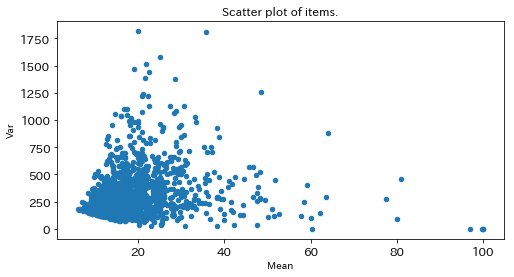

In [12]:
import numpy
df_stat2.plot(kind='scatter', x='Mean', y='Var',  title = "Scatter plot of items.", figsize=(8, 4), fontsize=12)